In [1]:
#importing the basic libraries.
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\AI-ML\Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


## Data Preprocessing

In [3]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df.tail()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [5]:
df.shape

(125973, 43)

In [6]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [8]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [10]:
#Most of the Values is zero.
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [11]:
df.shape

(125973, 39)

In [12]:
# DataType value is Object
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [13]:
# ON Attack - Classifing the attacks as 'Normal' & 'Attack'
df['attack'].loc[df['attack']!='normal']='attack'

In [14]:
df['attack']

0         normal
1         normal
2         attack
3         normal
4         normal
           ...  
125968    attack
125969    normal
125970    normal
125971    attack
125972    normal
Name: attack, Length: 125973, dtype: object

## Data Visualization

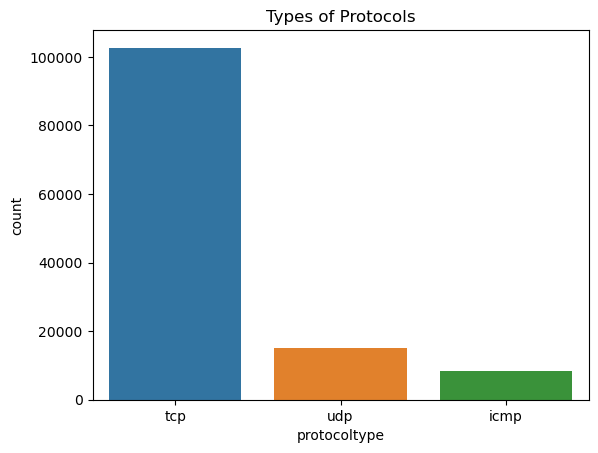

In [15]:
plt.title('Types of Protocols')
sns.countplot(x='protocoltype',data=df)
plt.show()

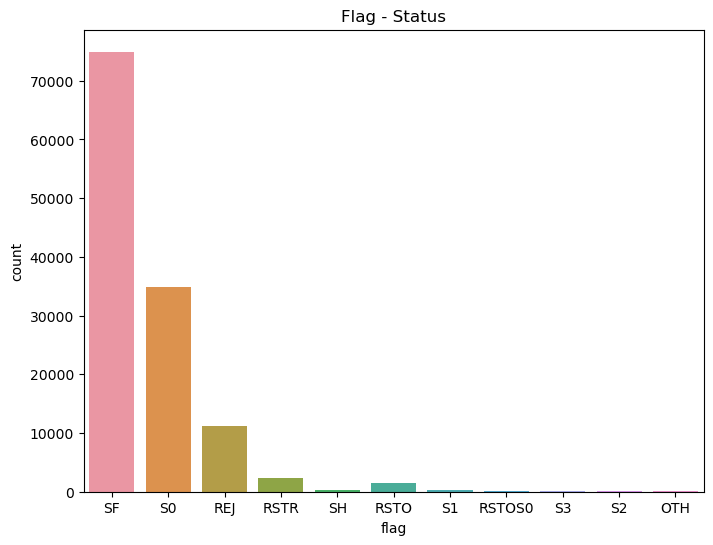

In [16]:
plt.figure(figsize=(8, 6)) 
plt.title('Flag - Status')
sns.countplot(x='flag',data=df)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

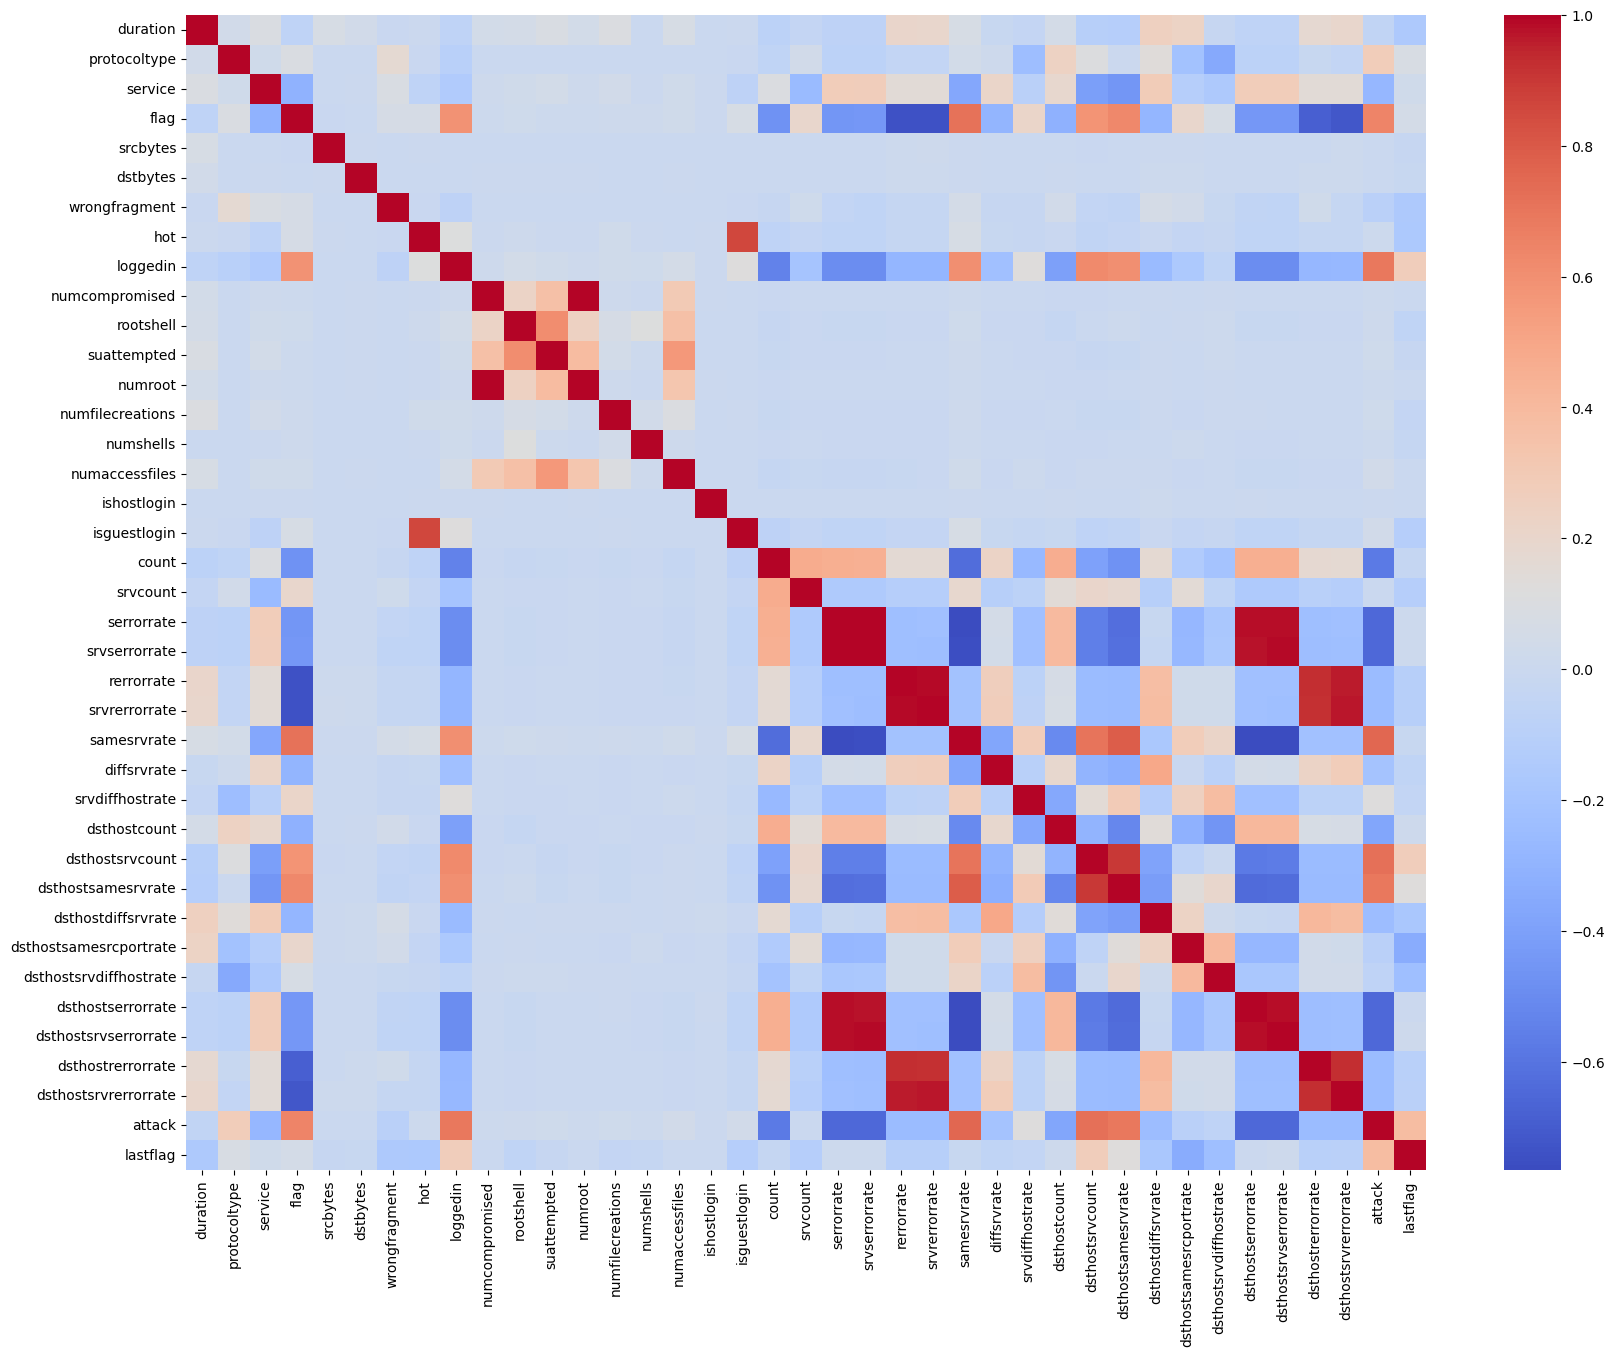

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

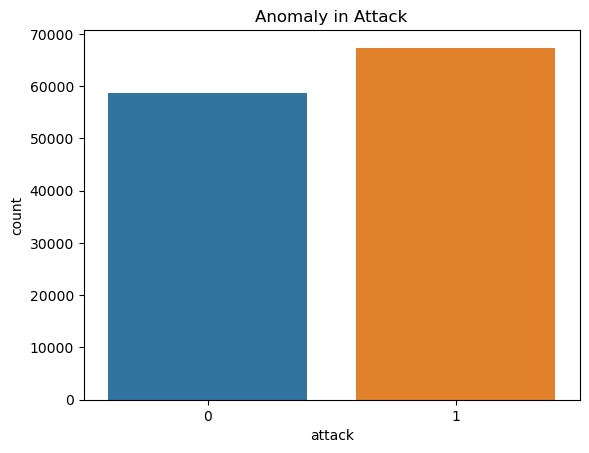

In [19]:
plt.title('Anomaly in Attack')
sns.countplot(x='attack',data=df)
plt.show()

## Data Splitting


In [20]:
# Split data into features (X) and target variable (y)
X=df.iloc[:,df.columns!= 'attack']
y=df.iloc[:,df.columns=='attack']

In [21]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)


## Machine Learning Models

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_transformed,y)
lr_pred=lr.predict(X_transformed)

In [23]:
lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

In [24]:
lr_df.head()

,actual,pred
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc
lr_acc = accuracy_score(y, lr_pred)
lr_acc

0.9783207512720979

### Random Forest

In [26]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(n_estimators = 300,random_state = 0 )  # N-estimator - number of times prdiction

reg.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [27]:
y_pred = reg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc
rf_acc = accuracy_score(y_pred,y_test)
rf_acc

0.9996824766818814

In [29]:
from sklearn.metrics import classification_report
clf = classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11769
           1       1.00      1.00      1.00     13426

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



### Isolation Forest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.02, random_state=42)

In [31]:
y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc
If_acc = accuracy_score(y_pred,y_test)
If_acc

0.9996824766818814

In [33]:
from sklearn.metrics import classification_report
clf1 = classification_report(y_pred,y_test)
print(clf1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11769
           1       1.00      1.00      1.00     13426

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



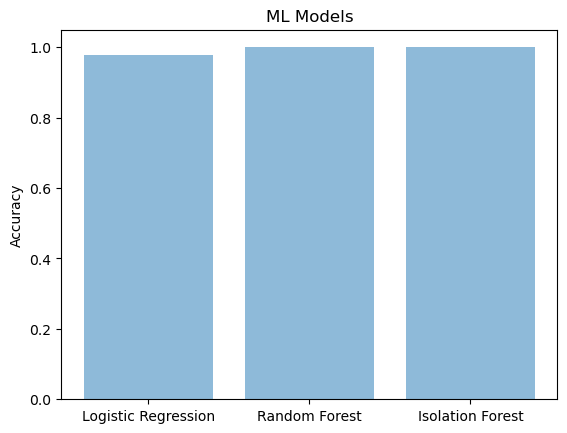

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Logistic Regression', 'Random Forest','Isolation Forest')
y_pos = np.arange(len(objects))
performance = [lr_acc,rf_acc,If_acc]

plt.bar(y_pos,performance,align = 'center',alpha = 0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Accuracy')
plt.title('ML Models')
plt.show()

### Model Deployment

In [35]:
df.iloc[1,:]

duration                    0.00
protocoltype                2.00
service                    44.00
flag                        9.00
srcbytes                  146.00
dstbytes                    0.00
wrongfragment               0.00
hot                         0.00
loggedin                    0.00
numcompromised              0.00
rootshell                   0.00
suattempted                 0.00
numroot                     0.00
numfilecreations            0.00
numshells                   0.00
numaccessfiles              0.00
ishostlogin                 0.00
isguestlogin                0.00
count                      13.00
srvcount                    1.00
serrorrate                  0.00
srvserrorrate               0.00
rerrorrate                  0.00
srvrerrorrate               0.00
samesrvrate                 0.08
diffsrvrate                 0.15
srvdiffhostrate             0.00
dsthostcount              255.00
dsthostsrvcount             1.00
dsthostsamesrvrate          0.00
dsthostdif

In [36]:
import pandas as pd

# Assuming you already have the DataFrame 'df' and 'model' for prediction

# Get user inputs for features
X = df.iloc[:, df.columns != 'attack']

user_inputs = {}
for feature in X:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs[feature] = [user_input]

# Create a DataFrame from the user inputs
user_df = pd.DataFrame(user_inputs)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred[0] == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This Network is Under 'Attack'")
else:
    print("No anomaly detected: This Network is normal.")


Enter the value for 'duration': 0
Enter the value for 'protocoltype': 2
Enter the value for 'service': 44
Enter the value for 'flag': 9
Enter the value for 'srcbytes': 150
Enter the value for 'dstbytes': 0
Enter the value for 'wrongfragment': 0
Enter the value for 'hot': 0
Enter the value for 'loggedin': 0
Enter the value for 'numcompromised': 0
Enter the value for 'rootshell': 0
Enter the value for 'suattempted': 0
Enter the value for 'numroot': 0
Enter the value for 'numfilecreations': 0
Enter the value for 'numshells': 0
Enter the value for 'numaccessfiles': 0
Enter the value for 'ishostlogin': 0
Enter the value for 'isguestlogin': 0
Enter the value for 'count': 15
Enter the value for 'srvcount': 1
Enter the value for 'serrorrate': 0
Enter the value for 'srvserrorrate': 0
Enter the value for 'rerrorrate': 0
Enter the value for 'srvrerrorrate': 0
Enter the value for 'samesrvrate': 0.09
Enter the value for 'diffsrvrate': 0.15
Enter the value for 'srvdiffhostrate': 0
Enter the value fo